# Articulate “Specific aim”

The aim of this project will be to predict the number of refugees who find asylum in countries around the world. I will look into specific variables related to a countries profile (Ex: population, density, area rainfall (ml), GDP (US dollars), etc.)

# Outline proposed methods and models

Methods:
    - Remove any outliers from the data that might skew the distribution
    - Using the key and countries create a folium distribution mapping the refugees in 2010 and 2015
    - After cleaning and EDA, find the variables and type of regressor model that best predicts the target variable
    
Models:
    - Regression model predicting the number of Refugees in each country
    - Decision Tree looking into different scenarios of options.
    - Possible clustering looking into the Continent

# Define risks & assumptions

Risks: The risks include not cleaning the data well enough allowing for countries spelled differently to not contain Data. This will lead to multiple missing data rows, causing the model and EDA to be off. Another risk is the time range, having a small range might not show a range of difference, however this fix shouldn't be too difficult. A risk I currenly have is the rain dataset, some of the data range from 2010 to 2014 which isn't 100% accurate; however, this was one of the best data I could find for scrapping.

Assumptions: One assumption I have made is to look into the years where there have been major political turmoil and wars. I have assumed these years to be 2010 to 2015. Some other assumptions include GDP in American Dollars (millions), Rainfall in ml, Area in miles, and Density in pop/mi.

# Describe data cleaning/munging techniques

The main data cleaning will involve scrapping the data from the links and formatting them into a dataframe. However, I realized there were countries which were spelled differently amongst the dataframes. I found the difference between the dataframes and modified the cell values. After getting the individual dataframes of the attributes I did a left merge to include all the countries in the json file with the variable values. Other techniques involved changing a object numeric type to float, and removing unwanted character

# Bonus

Some additional datasets I found included statistics for the number of children out of school, and the cost of living based on US $. These datasets will show a relationship between a poor country and how many refugees they could allow into their country

# Perform & summarize EDA

In [1]:
import requests
from lxml import html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugees2015 = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Refugees2015.csv', skiprows=2)
refugees2010 = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Refugees2010.csv', skiprows=2)

#Rename and drop the columns listed below.
refugees2010.rename(columns={'Country / territory of asylum/residence': 'Country', 'Refugees (incl. refugee-like situations)': 'Refugees_2010'}, inplace=True)
refugees2015.rename(columns={'Country / territory of asylum/residence': 'Country', 'Refugees (incl. refugee-like situations)': 'Refugees_2015'}, inplace=True)
refugees2010.drop(['Year', 'Origin'], axis = 1, inplace = True)
refugees2015.drop(['Year', 'Origin'], axis = 1, inplace = True)

#Change refugees value to a numeric type.
refugees2015["Refugees_2015"] = pd.to_numeric(refugees2015["Refugees_2015"], errors='coerce')

#Grouping the dataframe by Country and taking the Refugees sum.
refugees2010 = refugees2010.groupby('Country')[['Refugees_2010']].sum()
refugees2015 = refugees2015.groupby('Country')[['Refugees_2015']].sum()

#Reset Index and fill nan's with 0.
refugees2010.reset_index(inplace = True)
refugees2015.reset_index(inplace = True)

refugees2010 = refugees2010.fillna(0)
refugees2015 = refugees2015.fillna(0)

In [3]:
#For sorting purposes I sorted the df by Country ascending.
refugees2010.sort_values(by = 'Country', inplace = True)
refugees2015.sort_values(by = 'Country', inplace = True)

In [4]:
#Using the json file I took the Key (Used in Folium) and the Country name
import json
from pprint import pprint

with open('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json') as data_file:    
    data = json.load(data_file)
    
countryVal = []
idVal = []
i = 0
while i < len(data['features']):
    idVal.append(data['features'][i]['id'])
    countryVal.append(data['features'][i]['properties']['name'])
    i+=1
    
key = pd.DataFrame({'Country': countryVal, 'Key': idVal})

In [5]:
#Looking into the differences in Country names in refugees2010 and key
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
keyList = key['Country'].tolist()
s = set(keyList)
diff_2010 = [x for x in refugee2010List if x not in s]
diff_2015 = [x for x in refugee2015List if x not in s]

In [6]:
print diff_2010 #Difference located in refugee2010 but not key

['Aruba', 'Bahamas', 'Bahrain', 'Bolivia (Plurinational State of)', 'Bonaire', 'British Virgin Islands', 'Brunei Darussalam', 'Cayman Islands', 'Central African Rep.', 'China, Hong Kong SAR', 'China, Macao SAR', 'Congo', 'Cura\xc3\xa7ao', 'Czech Rep.', "C\xc3\xb4te d'Ivoire", 'Dem. Rep. of the Congo', 'Dominican Rep.', 'Grenada', 'Guinea-Bissau', 'Iran (Islamic Rep. of)', 'Liechtenstein', 'Malta', 'Monaco', 'Montserrat', 'Rep. of Korea', 'Rep. of Moldova', 'Russian Federation', 'Saint Lucia', 'Serbia and Kosovo (S/RES/1244 (1999))', 'Singapore', 'Sint Maarten (Dutch part)', 'Syrian Arab Rep.', 'The former Yugoslav Republic of Macedonia', 'Timor-Leste', 'Tonga', 'United Rep. of Tanzania', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']


In [7]:
print keyList #Changed the diff_2010 to these countries.

[u'Afghanistan', u'Angola', u'Albania', u'United Arab Emirates', u'Argentina', u'Armenia', u'Antarctica', u'French Southern and Antarctic Lands', u'Australia', u'Austria', u'Azerbaijan', u'Burundi', u'Belgium', u'Benin', u'Burkina Faso', u'Bangladesh', u'Bulgaria', u'The Bahamas', u'Bosnia and Herzegovina', u'Belarus', u'Belize', u'Bolivia', u'Brazil', u'Brunei', u'Bhutan', u'Botswana', u'Central African Republic', u'Canada', u'Switzerland', u'Chile', u'China', u'Ivory Coast', u'Cameroon', u'Democratic Republic of the Congo', u'Republic of the Congo', u'Colombia', u'Costa Rica', u'Cuba', u'Northern Cyprus', u'Cyprus', u'Czech Republic', u'Germany', u'Djibouti', u'Denmark', u'Dominican Republic', u'Algeria', u'Ecuador', u'Egypt', u'Eritrea', u'Spain', u'Estonia', u'Ethiopia', u'Finland', u'Fiji', u'Falkland Islands', u'France', u'Gabon', u'United Kingdom', u'Georgia', u'Ghana', u'Guinea', u'Gambia', u'Guinea Bissau', u'Equatorial Guinea', u'Greece', u'Greenland', u'Guatemala', u'Guyana'

In [8]:
#Changing the Country's Name
refugees2010['Country'][10] = 'The Bahamas'
refugees2010['Country'][17] = 'Bolivia'
refugees2010['Country'][23] = 'Brunei'
refugees2010['Country'][31] = 'Central African Republic'
refugees2010['Country'][38] = 'Republic of the Congo'
refugees2010['Country'][44] = 'Czech Republic'
refugees2010['Country'][46] = 'Democratic Republic of the Congo'
refugees2010['Country'][49] = 'Dominican Republic'
refugees2010['Country'][76] = 'Iran'
refugees2010['Country'][127] = 'South Korea'
refugees2010['Country'][130] = 'Russia'
refugees2010['Country'][150] = 'Syria'
refugees2010['Country'][153] = 'Macedonia'
refugees2010['Country'][165] = 'United Republic of Tanzania'
refugees2010['Country'][170] = 'Venezuela'
refugees2010['Country'][171] = 'Vietnam'


refugees2015['Country'][10] = 'The Bahamas'
refugees2015['Country'][17] = 'Bolivia'
refugees2015['Country'][21] = 'Brunei'
refugees2015['Country'][30] = 'Central African Republic'
refugees2015['Country'][36] = 'Republic of the Congo'
refugees2015['Country'][41] = 'Czech Republic'
refugees2015['Country'][43] = 'North Korea'
refugees2015['Country'][44] = 'Democratic Republic of the Congo'
refugees2015['Country'][47] = 'Dominican Republic'
refugees2015['Country'][73] = 'Iran'
refugees2015['Country'][126] = 'South Korea'
refugees2015['Country'][127] = 'Moldova'
refugees2015['Country'][129] = 'Russia'
refugees2015['Country'][147] = 'Syria'
refugees2015['Country'][150] = 'Macedonia'
refugees2015['Country'][161] = 'United Republic of Tanzania'
refugees2015['Country'][165] = 'Venezuela'
refugees2015['Country'][166] = 'Vietnam'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: S

# Government

In [9]:
#Request the html for the country's government.
page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government')
tree = html.fromstring(page.text) 

#Xpath
gov = tree.xpath("//div/div/table/tr/td[2]/text()")
country = tree.xpath("//div/div/table/tr/td/a/text()")

In [10]:
country_sub = country[2:197]
gov_sub = gov[0:195]
gov = pd.DataFrame({'country' : country_sub, 'government' : gov_sub})
gov.rename(columns = {'country':'Country'}, inplace = True)
gov.sort_values(by = 'Country', inplace = True)

In [11]:
gov

,Country,government
0,Afghanistan,Republic
1,Albania,Republic
2,Algeria,Republic
3,Andorra,Constitutional monarchy
4,Angola,Republic
5,Antigua and Barbuda,Constitutional monarchy
6,Argentina,Republic
7,Armenia,Republic
8,Australia,Constitutional monarchy
9,Austria,Republic


In [12]:
#Seeing the difference between government Country and refugee Country

refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
govList = gov['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in govList if x not in s]
diff_2015 = [x for x in govList if x not in s2]

In [13]:
print diff_2010 #In Refugee2010 but not in govList

['Andorra', 'Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Bhutan', 'Cape Verde', "China, People's Republic of", 'Comoros', 'Congo', u"C\xf4te d'Ivoire", 'Dominica', 'East Timor', 'Equatorial Guinea', 'Federated States of Micronesia', 'Gambia, The', 'Holy See', 'Kiribati', 'Korea, North', 'Korea, South', 'Laos', 'Lesotho', 'Maldives', 'Marshall Islands', 'Mauritius', 'Moldova', 'Nauru', 'Palau', 'Palestine', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Serbia', 'Seychelles', 'Solomon Islands', 'South Sudan', u'S\xe3o Tom\xe9 and Pr\xedncipe', 'Tanzania', 'Tuvalu', 'United States']


In [14]:
print govList

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', u"C\xf4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',

In [15]:
#Rename the countrys
gov['Country'][11] = 'The Bahamas'
gov['Country'][35] = 'China'
gov['Country'][38] = 'Republic of the Congo'
gov['Country'][62] = 'Gambia'
gov['Country'][90] = 'North Korea'
gov['Country'][91] = 'South Korea'
gov['Country'][173] = 'United Republic of Tanzania'
gov['Country'][186] = 'United States of America'

# GDP

In [16]:
#Read an excel file by sheet
GDP_1 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 1')
GDP_2 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 2')
GDP_3 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 3')
GDP_4 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 4')

#Concat the sheets into a dataframe
frames = [GDP_1, GDP_2, GDP_3, GDP_4]
GDP = pd.concat(frames)

GDP.drop(['Ranking', 'Unnamed: 1', 'Unnamed: 4'], axis=1, inplace=True)

GDP = GDP[0:195]

#Convert the dataframe column to a numeric type
GDP["(millions of\nUS dollars)"] = GDP["(millions of\nUS dollars)"].str.replace(",","")
GDP["(millions of\nUS dollars)"] = pd.to_numeric(GDP["(millions of\nUS dollars)"], errors = 'coerce')

#Fill the GDP with 0, rename column, and sort for reference use.
GDP = GDP.fillna(0)
GDP.rename(columns = {'Economy': 'Country'}, inplace=True)
GDP.sort_values(by = 'Country', inplace = True)

In [17]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
GDPList = GDP['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in GDPList if x not in s]
diff_2015 = [x for x in GDPList if x not in s2]

In [18]:
print diff_2010 #Countrys contained in refugee2010

[u'Andorra', u'Antigua and Barbuda', u'Bahamas, The', u'Barbados', u'Bermuda', u'Bhutan', u'Brunei Darussalam', u'Cabo Verde', u'Comoros', u'Congo, Dem. Rep.', u'Congo, Rep.', u"C\xf4te d'Ivoire", u'Dominica', u'Egypt, Arab Rep.', u'Equatorial Guinea', u'Faroe Islands', u'Gambia, The', u'Greenland', u'Hong Kong SAR, China', u'Iran, Islamic Rep.', u'Isle of Man', u'Kiribati', u'Korea, Rep.', u'Kosovo', u'Kyrgyz Republic', u'Lao PDR', u'Lesotho', u'Macao SAR, China', u'Macedonia, FYR', u'Maldives', u'Marshall Islands', u'Mauritius', u'Micronesia, Fed. Sts.', u'Moldova', u'Palau', u'Puerto Rico', u'Russian Federation', u'Samoa', u'Serbia', u'Seychelles', u'Slovak Republic', u'Solomon Islands', u'South Sudan', u'St. Kitts and Nevis', u'St. Lucia', u'St. Vincent and the Grenadines', u'S\xe3o Tom\xe9 and Principe', u'Tanzania', u'Tuvalu', u'United States', u'Venezuela, RB', u'West Bank and Gaza', u'Yemen, Rep.']


In [19]:
print GDPList #Refernce for renaming the countries.

[u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola', u'Antigua and Barbuda', u'Argentina', u'Armenia', u'Australia', u'Austria', u'Azerbaijan', u'Bahamas, The', u'Bahrain', u'Bangladesh', u'Barbados', u'Belarus', u'Belgium', u'Belize', u'Benin', u'Bermuda', u'Bhutan', u'Bolivia', u'Bosnia and Herzegovina', u'Botswana', u'Brazil', u'Brunei Darussalam', u'Bulgaria', u'Burkina Faso', u'Burundi', u'Cabo Verde', u'Cambodia', u'Cameroon', u'Canada', u'Central African Republic', u'Chad', u'Chile', u'China', u'Colombia', u'Comoros', u'Congo, Dem. Rep.', u'Congo, Rep.', u'Costa Rica', u'Croatia', u'Cuba', u'Cyprus', u'Czech Republic', u"C\xf4te d'Ivoire", u'Denmark', u'Djibouti', u'Dominica', u'Dominican Republic', u'Ecuador', u'Egypt, Arab Rep.', u'El Salvador', u'Equatorial Guinea', u'Estonia', u'Ethiopia', u'Faroe Islands', u'Fiji', u'Finland', u'France', u'Gabon', u'Gambia, The', u'Georgia', u'Germany', u'Ghana', u'Greece', u'Greenland', u'Grenada', u'Guatemala', u'Guinea', u'Gui

In [20]:
GDP.reset_index(inplace = True)

#Rename the country values
GDP['Country'][11] = 'The Bahamas'
GDP['Country'][25] = 'Brunei'
GDP['Country'][39] = 'Democratic Republic of the Congo'
GDP['Country'][40] = 'Republic of the Congo'
GDP['Country'][52] = 'Egypt'
GDP['Country'][62] = 'Gambia'
GDP['Country'][80] = 'Iran'
GDP['Country'][92] = 'South Korea'
GDP['Country'][144] = 'Russia'
GDP['Country'][171] = 'Tanzania'
GDP['Country'][185] = 'United States of America'
GDP['Country'][189] = 'Venezuela'
GDP['Country'][192] = 'Yemen'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

# Immigrant Population

In [21]:
#Read the html link and return the population, country
page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_immigrant_population')
tree = html.fromstring(page.text)

population = tree.xpath('//div/div/table[1]/tr/td[2]/text()')
popfirst = tree.xpath('//div/div/table[1]/tr/td[2]/span/text()')
country = tree.xpath('//div/div/table[1]/tr/td[1]/a/text()')

In [22]:
popfirst = popfirst[0]
population = [popfirst] + population 
#The xpath didn't return the first value so I appended it to the list at the front.

In [23]:
#Subsetting the population and later on adding them.
p1 = population[0:20]
p2 = population[21:76]
p3 = population[77:116]
p4 = population[117:125]
p5 = population[126:129]
p6 = population[130:135]
p7 = population[137:139]
p8 = population[140:142]
p9 = population[144]
p10 = population[146:155]
p11 = population[156:159]
p12 = population[160]
p13 = population[162]
p14 = population[164]
p15 = population[166:178]
p16 = population[179:189]
p17 = population[190:196]
p18 = population[197:199]
p19 = population[201]
p20 = population[203:205]
p21 = population[206:210]
p22 = population[211]
p23 = population[214:216]
p24 = population[217:220]
p25 = population[221]
p26 = population[224]
p27 = population[227:229]

In [24]:
pfirst = p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8
pfirst.append(p9)
psecond = pfirst + p10 + p11
psecond.append(p12)
psecond.append(p13)
psecond.append(p14)
pthird = psecond + p15 + p16 + p17 + p18
pthird.append(p19)
pfour = pthird + p20 + p21
pfour.append(p22)
pfive = pfour + p23 + p24
pfive.append(p25)
pfive.append(p26)
population = pfive + p27

In [25]:
immigrant = pd.DataFrame({'Country' : country, 'Immigrants' : population})

In [26]:
immigrant

,Country,Immigrants
0,United States,"46,627,102"
1,Germany,"12,005,690"
2,Russia,"11,643,276"
3,Saudi Arabia,"9,060,433"
4,United Kingdom,"8,543,120"
5,United Arab Emirates,"7,826,981"
6,France,"7,784,418"
7,Canada,"7,284,069"
8,Australia,"6,763,663"
9,Spain,"5,852,953"


In [27]:
#Taking the refugee list and getting the difference from immigrants
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
immList = immigrant['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in immList if x not in s]
diff_2015 = [x for x in immList if x not in s2]

In [28]:
print diff_2010 #Contain in immigrants but not refugees2010

['United States', 'Ivory Coast', 'Serbia', 'South Sudan', 'Democratic Republic of Congo', 'Republic of Congo', 'Tanzania', 'Palestine', 'The Gambia', 'Moldova', 'Republic of Macedonia', 'Maldives', 'Bahamas', 'Bhutan', 'North Korea', 'Andorra', 'Mauritius', 'Barbados', 'Antigua and Barbuda', 'Sint Maarten', 'Laos', 'Bermuda', 'Cape Verde', 'Comoros', 'Seychelles', 'Saint Vincent and the Grenadines', 'Equatorial Guinea', 'Solomon Islands', 'Dominica', 'Sao Tome and Principe', 'Saint Kitts and Nevis', 'Samoa', 'Palau', 'San Marino', 'Lesotho', 'Kiribati', 'Micronesia', 'Nauru', 'Marshall Islands', 'Vatican City', 'Tokelau', 'Tuvalu']


In [29]:
print refugee2010List #Reference for the immigrant list

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [30]:
#Change the Country Names
immigrant['Country'][0] = 'United States of America'
immigrant['Country'][64] = 'Democratic Republic of the Congo'
immigrant['Country'][66] = 'Republic of the Congo'
immigrant['Country'][81] = 'United Republic of Tanzania'
immigrant['Country'][109] = 'Gambia'
immigrant['Country'][117] = 'Macedonia'
immigrant['Country'][134] = 'The Bahamas'
immigrant['Country'][166] = 'Guinea'

# Population Density

In [31]:
page = requests.get('http://www.worldatlas.com/aatlas/populations/ctypopls.htm')
tree = html.fromstring(page.text)

country = tree.xpath('//html/body/div/main/div/article/div/h2/text()')
pop = tree.xpath('/html/body/div/main/div/article/div/ul/li[1]/text()')
area = tree.xpath('/html/body/div/main/div/article/div/ul/li[4]/text()')
density = tree.xpath('/html/body/div/main/div/article/div/ul/li[5]/text()')

population = pd.DataFrame({'Country' : country, 'Area(mi)' : area, 'Population' : pop, 'Density(pop/mi)' : density})

In [32]:
population["Area(mi)"] = pd.to_numeric(population["Area(mi)"], errors='coerce')
population["Density(pop/mi)"] = pd.to_numeric(population["Density(pop/mi)"], errors='coerce')
population["Population"] = pd.to_numeric(population["Population"], errors='coerce')
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
Area(mi)           193 non-null float64
Country            193 non-null object
Density(pop/mi)    193 non-null float64
Population         193 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.1+ KB


In [33]:
#Find values contained in population but not refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
popList = population['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in popList if x not in s]
diff_2015 = [x for x in popList if x not in s2]

In [34]:
print diff_2010 #Countries in population

['Andorra', 'Antigua & Barbuda', 'Bahamas', 'Barbados', 'Bhutan', 'Bosnia & Herzegovina', 'Cape Verde', 'Comoros', 'Congo (Dem. Rep. of )', 'Congo (Rep.)', "Cote d'Ivoire", 'Dominica', 'East Timor', 'Equatorial Guinea', 'Kiribati', 'Korea (North)', 'Korea (South)', 'Laos', 'Lesotho', 'Maldives', 'Marshall Islands', 'Mauritius', 'Micronesia', 'Moldova', 'Nauru', 'Palau', 'Phillipines', 'Saint Kitts & Nevis', 'Samoa', 'San Marino', 'Sao Tome & Principe', 'Serbia & Montenegro', 'Seychelles', 'Solomon Islands', 'South Sudan', 'St. Vincent & the Grenadines', 'Tajikstan', 'Tanzania', 'Trinidad & Tobago', 'Tuvalu', 'United Kingdom (UK)', 'Vatican City']


In [35]:
print refugee2010List #In reference to the population

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [36]:
i = 0
while i < len(population):
    print i, population['Country'][i]
    i+=1

0 Afghanistan
1 Albania
2 Algeria
3 Andorra
4 Angola
5 Antigua & Barbuda
6 Argentina
7 Armenia
8 Australia
9 Austria
10 Azerbaijan
11 Bahamas
12 Bahrain
13 Bangladesh
14 Barbados
15 Belarus
16 Belgium
17 Belize
18 Benin
19 Bhutan
20 Bolivia
21 Bosnia & Herzegovina
22 Botswana
23 Brazil
24 Brunei
25 Bulgaria
26 Burkina Faso
27 Burundi
28 Cambodia
29 Cameroon
30 Canada
31 Cape Verde
32 Central African Republic
33 Chad
34 Chile
35 China
36 Colombia
37 Comoros
38 Congo (Dem. Rep. of )
39 Congo (Rep.)
40 Costa Rica
41 Cote d'Ivoire
42 Croatia
43 Cuba
44 Cyprus
45 Czech Republic
46 Denmark
47 Djibouti
48 Dominica
49 Dominican Republic
50 East Timor
51 Ecuador
52 Egypt
53 El Salvador
54 Equatorial Guinea
55 Eritrea
56 Estonia
57 Ethiopia
58 Fiji
59 Finland
60 France
61 Gabon
62 Gambia
63 Georgia
64 Germany
65 Ghana
66 Greece
67 Grenada
68 Guatemala
69 Guinea
70 Guinea-Bissau
71 Guyana
72 Haiti
73 Honduras
74 Hungary
75 Iceland
76 India
77 Indonesia
78 Iran
79 Iraq
80 Ireland
81 Israel
82 Ital

In [37]:
#Bahamas to The Bahamas 11
#Bosnia & Herzegovina to Bosnia and Herzegovina 21
#Congo (Dem. Rep. of ) to Democratic Republic of the Congo 38
#Congo (Rep.) to Republic of the Congo 39
#Cote d'Ivoire to Côte d'Ivoire 41
#Korea (North) to North Korea 89
#Korea (South) to South Korea 90
#Phillipines to Philipines 136
#Tajikstan to Tajikistan 169
#Tanzania to United Republic of Tanzania 170
#Trinidad & Tobago to Trinidad and Tobago 174
#United Kingdom (UK) to United Kingdom 182


population['Country'][11] = 'The Bahamas'
population['Country'][21] = 'Bosnia and Herzegovina'
population['Country'][38] = 'Democratic Republic of the Congo'
population['Country'][39] = 'Republic of the Congo'
population['Country'][41] = "Côte d'Ivoire"
population['Country'][89] = 'North Korea'
population['Country'][90] = 'South Korea'
population['Country'][136] = 'Philipines'
population['Country'][169] = 'Tajikistan'
population['Country'][170] = 'United Republic of Tanzania'
population['Country'][174] = 'Trinidad and Tobago'
population['Country'][182] = 'United Kingdom'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [38]:
#I will take the total population and the average Density, Population, Area while grouping
p_df = population.groupby('Country')[['Population']].sum()
p_df = p_df.reset_index()
population.drop(['Population'], axis = 1, inplace = True)
population_final = pd.merge(population, p_df, on = 'Country', how = 'inner')
population = population_final.groupby('Country')[['Density(pop/mi)', 'Population', 'Area(mi)']].mean()
population = population.reset_index()
population.sort_values(by = 'Population', ascending = False)

,Country,Density(pop/mi),Population,Area(mi)
34,China,361.42,1339190000,3705405.45
74,India,933.27,1184639000,1269345.07
183,United States of America,83.38,309975000,3717811.29
75,Indonesia,315.99,234181400,741099.62
22,Brazil,58.84,193364000,3286486.71
127,Pakistan,548.51,170260000,310402.84
123,Nigeria,443.71,170123000,356668.67
12,Bangladesh,2957.35,164425000,55598.69
139,Russia,21.53,141927297,6592768.87
82,Japan,873.17,127380000,145882.85


# Population

In [39]:
#Continent data frame
continent = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Countries-Continents-csv.csv')
continent.drop(['Column', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9'], axis = 1, inplace = True)

In [40]:
#Finding the countrys in continent but not in refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
contList = continent['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in contList if x not in s]
diff_2015 = [x for x in contList if x not in s2]

In [41]:
print diff_2010

['Burkina', 'Cape Verde', 'Comoros', 'Congo', 'Congo, Democratic Republic of', 'Equatorial Guinea', 'Ivory Coast', 'Lesotho', 'Mauritius', 'Sao Tome and Principe', 'Seychelles', 'South Sudan', 'Tanzania', 'Bhutan', 'Burma (Myanmar)', 'East Timor', 'Korea, North', 'Korea, South', 'Laos', 'Maldives', 'Russian Federation', 'Andorra', 'Moldova', 'San Marino', 'Serbia', 'Vatican City', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Dominica', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'United States', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'Palau', 'Samoa', 'Solomon Islands', 'Tuvalu']


In [42]:
#In reference
print refugee2010List

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [43]:
#Rename the cell value
continent['Country'][11] = 'Republic of the Congo'
continent['Country'][12] = 'Democratic Republic of the Congo'
continent['Country'][48] = 'United Republic of Tanzania'
continent['Country'][59] = 'Myanmar'
continent['Country'][71] = 'North Korea'
continent['Country'][72] = 'South Korea'
continent['Country'][85] = 'Russia'
continent['Country'][147] = 'The Bahamas'
continent['Country'][167] = 'United States of America'

# Rain fall

In [44]:
#Reading the data for rain and scraping the Country and rain fall in ml
page = requests.get('http://www.nationmaster.com/country-info/stats/Geography/Average-precipitation-in-depth/Mm-per-year')
tree = html.fromstring(page.text)

country = tree.xpath("//div/div/table/tbody/tr/td[2]/a/span/text()")
rain = tree.xpath("//div/div/table/tbody/tr/td[@class = 'amount']/text()")

rain = pd.DataFrame({'Country' : country, 'Rain(ml)' : rain})

In [45]:
rain['Rain(ml)'] = rain['Rain(ml)'].map(lambda x: x.lstrip('\r\n                  ').rstrip('\r\n            '))

In [46]:
#Take the numeric value.
rain["Rain(ml)"] = rain["Rain(ml)"].str.replace(",","")
rain["Rain(ml)"] = pd.to_numeric(rain["Rain(ml)"], errors = 'coerce')

In [47]:
#Take the difference in rain list and refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
rainList = rain['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in rainList if x not in s]
diff_2015 = [x for x in rainList if x not in s2]

In [48]:
print diff_2010

['Sao Tome and Principe', 'Solomon Islands', 'Seychelles', 'Bhutan', 'Equatorial Guinea', 'Burma', 'Dominica', 'Puerto Rico', 'Mauritius', 'Maldives', 'Laos', 'Former Spanish colonies', 'Latin America and Caribbean', 'Saint Vincent and the Grenadines', 'East Timor', 'Saint Kitts and Nevis', 'Barbados', 'Hot countries', 'Catholic countries', 'South Asia', "Cote d'Ivoire", 'Christian countries', 'Former British colonies', 'Emerging markets', 'Heavily indebted countries', 'Sub-Saharan Africa', 'Tanzania', 'South and Central Asia', 'North Korea', 'Antigua and Barbuda', 'Religious countries', 'Sparsely populated countries', 'Former French colonies', 'High income OECD countries', 'Group of 7 countries (G7)', 'Cold countries', 'Comoros', 'failed states', 'Non-religious countries', 'NATO countries', 'Europe', 'The Gambia', 'Eastern Europe', 'Lesotho', 'Eurozone', 'European Union', 'United States', 'Muslim countries', 'Republic of Macedonia', 'Former Soviet republics', 'OPEC countries', 'Moldov

In [49]:
print refugee2010List

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [50]:
rain['Country'][54] = 'Guinea Bissau'
rain['Country'][96] = 'United Republic of Tanzania'
rain['Country'][122] = 'Gambia'
rain['Country'][133] = 'United States of America'
rain['Country'][151] = 'Macedonia'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packag

# Murder Rate

In [51]:
#Murder Rate by Country
page = requests.get('http://www.nationmaster.com/country-info/stats/Crime/Murder-rate')
tree = html.fromstring(page.text)

murder = tree.xpath('//div/div/table/tbody/tr/td[2]/text()')
country = tree.xpath('//div/div/table/tbody/tr/td/a/span/text()')

murder = murder[0:151]
murder = pd.DataFrame({'Country' : country, 'Murder Rate' : murder})

In [52]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
murList = murder['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in murList if x not in s]
diff_2015 = [x for x in murList if x not in s2]

In [53]:
print diff_2010
#Tanzania to United Republic of Tanzania [137]
#United States to United States of America [145]

['Andorra', 'Antigua and Barbuda', 'Barbados', 'Bhutan', 'Cape Verde', 'Comoros', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Lesotho', 'Maldives', 'Mauritius', 'Moldova', 'Northern Ireland', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Scotland', 'Seychelles', 'Soviet Union', 'Tanzania', 'United States']


In [54]:
murder['Country'][137] = 'United Republic of Tanzania'
murder['Country'][145] = 'United States of America'

# Murder

In [55]:
page = requests.get('http://www.nationmaster.com/country-info/stats/Education/Children-out-of-school%2C-primary-per-1000')
tree = html.fromstring(page.text)

education = tree.xpath('//div/div/table/tbody/tr/td[@class="amount"]/text()')
country = tree.xpath('//div/div/table/tbody/tr/td[2]/a/span/text()')

In [56]:
education = pd.DataFrame({'Country' : country, 'Children_out_of_school' : education})

In [57]:
education['Children_out_of_school'] = education['Children_out_of_school'].map(lambda x: x.lstrip('\r\n').rstrip('\r\n        '))

In [58]:
education["Children_out_of_school"] = pd.to_numeric(education["Children_out_of_school"], errors = 'coerce')

In [59]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
Children_out_of_school    198 non-null float64
Country                   198 non-null object
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [60]:
i = 0
while i < len(education):
    print i, education['Country'][i]
    i+=1

0 Somalia
1 Afghanistan
2 Democratic Republic of the Congo
3 Sierra Leone
4 Liberia
5 Eritrea
6 Nigeria
7 Haiti
8 Chad
9 Cote d'Ivoire
10 Niger
11 Papua New Guinea
12 Burkina Faso
13 Equatorial Guinea
14 Burma
15 Mauritania
16 Guinea-Bissau
17 Mali
18 Central African Republic
19 The Gambia
20 Djibouti
21 Guinea
22 Brazil
23 Ethiopia
24 Senegal
25 Madagascar
26 Zimbabwe
27 Guyana
28 Pakistan
29 Lesotho
30 Swaziland
31 Mozambique
32 Kenya
33 Ghana
34 Botswana
35 Angola
36 Comoros
37 Bolivia
38 Paraguay
39 Yemen
40 Saint Kitts and Nevis
41 Saint Lucia
42 Namibia
43 Uganda
44 Turks and Caicos Islands
45 Philippines
46 Antigua and Barbuda
47 China
48 East Timor
49 Cameroon
50 Iraq
51 Republic of the Congo
52 Puerto Rico
53 South Africa
54 Colombia
55 South Asia
56 Gabon
57 Malta
58 Togo
59 Dominican Republic
60 Jamaica
61 Bhutan
62 Solomon Islands
63 Former Spanish colonies
64 Middle Eastern and North Africa
65 Nicaragua
66 Panama
67 Suriname
68 Bermuda
69 Zambia
70 Burundi
71 Honduras
72 B

In [61]:
education['Country'][16] = 'Guinea Bissau'
education['Country'][19] = 'Gambia'
education['Country'][86] = 'United States of America'
education['Country'][99] = 'United Republic of Tanzania'
education['Country'][158] = 'Macedonia'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packag

In [62]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
eduList = education['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in eduList if x not in s]
diff_2015 = [x for x in eduList if x not in s2]

In [63]:
print diff_2010
#Change Guinea-Bissau to Guinea Bissau [16]
#The Gambia to Gambia [19]
#United States to United States of America [86]
#Tanzania to United Republic of Tanzania [99]
#Republic of Macedonia to Macedonia [158]

["Cote d'Ivoire", 'Equatorial Guinea', 'Burma', 'Guinea Bissau', 'Lesotho', 'Comoros', 'Saint Kitts and Nevis', 'Turks and Caicos Islands', 'Antigua and Barbuda', 'East Timor', 'Puerto Rico', 'South Asia', 'Bhutan', 'Solomon Islands', 'Former Spanish colonies', 'Middle Eastern and North Africa', 'Bermuda', 'Macau', 'Maldives', 'Heavily indebted countries', 'Samoa', 'Seychelles', 'French Polynesia', 'Emerging markets', 'Laos', 'Dominica', 'Moldova', 'Kiribati', 'Cape Verde', 'San Marino', 'Serbia', 'Former Soviet republics', 'Barbados', 'Sao Tome and Principe', 'Mauritius', 'High income OECD countries', 'European Union', 'Eurozone', 'NATO countries', 'Group of 7 countries (G7)', 'Saint Vincent and the Grenadines', 'Hong Kong', 'Marshall Islands']


# Poverty

In [64]:
#Poverty Rate
import urllib2
from lxml import etree

parser = etree.HTMLParser()
tree = etree.parse(urllib2.urlopen('http://www.indexmundi.com/g/r.aspx?v=69'), parser)

country = tree.xpath('//div[@id="main"]/div[@id = "content"]/table/tr/td[2]/a/text()')
poverty = tree.xpath('//div[@id="main"]/div[@id = "content"]/table/tr/td[3]/text()')
poverty = pd.DataFrame({'Country' : country, 'Poverty' : poverty})

In [65]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
povList = poverty['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in povList if x not in s]
diff_2015 = [x for x in povList if x not in s2]

In [66]:
poverty['Country'][3] = 'Democratic Republic of the Congo'
poverty['Country'][24] = 'Gambia'
poverty['Country'][28] = 'Republic of Congo'
poverty['Country'][48] = 'United Republic of Tanzania'
poverty['Country'][119] = 'South Korea'
poverty['Country'][126] = 'United States of America'
poverty['Country'][143] = 'The Bahamas'

In [67]:
print diff_2010
#Congo to Democratic Republic of the Congo [3]
#Gambia, The to Gambia [24]
#Congo, Republic of the to Republic of Congo [28]
#Tanzania to United Republic of Tanzania [48]
#Korea, South to South Korea [119]
#United States to United States of America [126]
#Bahamas, The to The Bahamas [143]

['Congo, Democratic Republic of the', 'Sao Tome and Principe', 'Comoros', 'South Sudan', 'Lesotho', 'Gambia, The', 'Congo, Republic of the', "Cote d'Ivoire", 'East Timor', 'Gaza Strip', 'Tanzania', 'Burma', 'Cape Verde', 'Kosovo', 'Dominica', 'Virgin Islands', 'Micronesia, Federated States of', 'Anguilla', 'Guam', 'Laos', 'Moldova', 'French Polynesia', 'Hong Kong', 'West Bank', 'Korea, South', 'Maldives', 'United States', 'Bhutan', 'Bermuda', 'Bahamas, The', 'Greenland', 'Serbia', 'Mauritius', 'Taiwan']


# Famine

In [68]:
#Famine

# Zimbabwe
# 2003- famine in Sudan/Darfur (Darfur conflict)
# 2005 Malawi food crisis
# 2005-06 Niger food crisis
# 2006 Horn of Africa food crisis (Djibouti, Eritrea, Ethiopia, and Somalia)
# 2008- North Korean food crisis
# 2008- Afghanistan food crisis
# 2008- Bangladesh food crisis
# 2008- East Africa food crisis (United Republic of Tanzania, Kenya and Uganda, Burundi and Rwanda)

In [69]:
famList = []
i = 0
while i < len(refugees2010['Country']):
    if refugees2010['Country'][i] == 'Sudan':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Darfur':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Malawi':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Niger':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Djibouti':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Eritrea':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Ethiopia':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Somalia':
        famList.append(1)
    elif refugees2010['Country'][i] == 'North Korea':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Afghanistan':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Bangladesh':
        famList.append(1)
    elif refugees2010['Country'][i] == 'United Republic of Tanzania':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Kenya':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Uganda':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Burundi':
        famList.append(1)
    elif refugees2010['Country'][i] == 'Rwanda':
        famList.append(1)
    else:
        famList.append(0)
    i+=1
refugees2010['Famine'] = famList

# Civil War

In [70]:
#Civil War

# Albanian rebellion in Macedonia, 2001 (Macedonia)
# First Ivorian Civil War, 2002–2007 (Côte d'Ivoire)
# Iraq War (20 March 2003 – 18 December 2011) (Iraq)
# Houthi insurgency in Yemen, 18 June 2004 – 6 February 2015 (Yemen)
# Fourth Chadian Civil War, 18 December 2005 – 15 January 2010 (Chad)
# Civil War in Iraq, 2006–2007, a sub-conflict within the Iraq War February 2006 – February 2007 (Iraq)
# Fatah-Hamas conflict (Palestine), 2006–2007, tensions ongoing (Palestine)
# Second Ivorian Civil War, 2010–2011 (Cote d Ivoire)
# 2010–12 Burma border clashes 7 November 2010 – 12 January 2012 (Burma)
# Libyan Civil War, 15 February 2011 – 23 October 2011 (Libya)
# Post-civil war violence in Libya, 1 November 2011 – 16 May 2014 (Libya)
# Iraqi insurgency, 18 December 2011 – 31 December 2013 (Syria)
# Tuareg Rebellion in Mali, 16 January 2012 – 6 April 2012 (Mali)
# Northern Mali conflict, 16 January 2012 – 20 February 2015 (Mali)
# M23 rebellion, 4 April 2012 - 7 November 2013 (Democratic of Congo)

In [71]:
i = 0
civList = []
while i < len(refugees2010):
    if refugees2010['Country'][i] == 'Macedonia':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Iraq':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Yemen':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Chad':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Palestine':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Burma':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Libya':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Syria':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Mali':
        civList.append(1)
    elif refugees2010['Country'][i] == 'Democratic Republic of the Congo':
        civList.append(1)
    else:
        civList.append(0)
    i+=1
refugees2010['Civil'] = civList

# Gender Distribution

In [72]:
from selenium import webdriver

browser = webdriver.Chrome('/Users/nsivapra/Downloads/chromedriver')
browser.get('http://www.worldometers.info/world-population/world-population-gender-age.php') # Load page (redacted here, but any works)
country = browser.find_elements_by_xpath("//div/div/table/tbody/tr/td[@class='google-visualization-table-td'][1]")
male = browser.find_elements_by_xpath("//div/div/table/tbody/tr/td[@class='google-visualization-table-td google-visualization-table-td-number'][2]")
female = browser.find_elements_by_xpath("//div/div/table/tbody/tr/td[@class='google-visualization-table-td google-visualization-table-td-number'][3]")
countryList = []
maleList = []
femaleList = []
for c in country:
    countryList.append(c.text)
for m in male:
    maleList.append(m.text)
for f in female:
    femaleList.append(f.text)

In [73]:
gender = pd.DataFrame({'Country' : countryList, 'Male' : maleList, 'Female': femaleList})

In [74]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
genList = gender['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in genList if x not in s]
diff_2015 = [x for x in genList if x not in s2]

In [75]:
i = 0
while i < len(gender['Country']):
    print i, gender['Country'][i]
    i+=1

0 China
1 India
2 United States of America
3 Indonesia
4 Brazil
5 Pakistan
6 Nigeria
7 Bangladesh
8 Russian Federation
9 Japan
10 Mexico
11 Philippines
12 Ethiopia
13 Viet Nam
14 Germany
15 Egypt
16 Iran (Islamic Republic of)
17 Turkey
18 Democratic Republic of the Congo
19 Thailand
20 France
21 United Kingdom
22 Italy
23 Myanmar
24 South Africa
25 Republic of Korea
26 United Republic of Tanzania
27 Colombia
28 Spain
29 Ukraine
30 Kenya
31 Argentina
32 Algeria
33 Poland
34 Sudan
35 Uganda
36 Canada
37 Iraq
38 Morocco
39 Afghanistan
40 Venezuela (Bolivarian Republic of)
41 Peru
42 Malaysia
43 Uzbekistan
44 Saudi Arabia
45 Nepal
46 Ghana
47 Mozambique
48 Dem. People s Republic of Korea
49 Yemen
50 Australia
51 Madagascar
52 Cameroon
53 Syrian Arab Republic
54 Romania
55 Angola
56 Sri Lanka
57 Cote d Ivoire
58 Niger
59 Chile
60 Burkina Faso
61 Netherlands
62 Kazakhstan
63 Malawi
64 Ecuador
65 Guatemala
66 Mali
67 Cambodia
68 Zambia
69 Zimbabwe
70 Senegal
71 Chad
72 Rwanda
73 Guinea
74 Sou

In [76]:
gender['Country'][8] = 'Russia'
gender['Country'][13] = 'Vietnam'
gender['Country'][16] = 'Iran'
gender['Country'][25] = 'South Korea'
gender['Country'][40] = 'Venezuela'
gender['Country'][48] = 'North Korea'
gender['Country'][53] = 'Syria'
gender['Country'][80] = 'Bolivia'
gender['Country'][122] = 'Republic of the Congo'
gender['Country'][142] = 'Macedonia'
gender['Country'][175] = 'The Bahamas'

In [77]:
print diff_2010
#Russian Federation to Russia [8]
#Viet Nam to Vietnam [13]
#Iran(Islamic Republic of) to Iran [16]
#Republic of Korea to South Korea [25]
#Venezuela( blkjlk) to Venezuela [40]
#Dem. People s to North Korea [48]
#Syrian Arab to Syria [53]
#Bolivia(lkjlk) to Bolivia [80]
#Congo, to Democratic REpublic of the COngo [122]
#TFYR Macedonia to Macedonia [142]
#Bahamas to The Bahamas [175]

[u'Russian Federation', u'Viet Nam', u'Iran (Islamic Republic of)', u'Republic of Korea', u'Venezuela (Bolivarian Republic of)', u'Dem. People s Republic of Korea', u'Syrian Arab Republic', u'Cote d Ivoire', u'South Sudan', u'Bolivia (Plurinational State of)', u'Serbia', u'Lao People s Democratic Republic', u'Congo', u'State of Palestine', u'Puerto Rico', u'Republic of Moldova', u'TFYR Macedonia', u'Lesotho', u'Mauritius', u'R\xe9union', u'Equatorial Guinea', u'Bhutan', u'Comoros', u'Western Sahara', u'China Macao SAR', u'Solomon Islands', u'Cape Verde', u'Guadeloupe', u'Brunei Darussalam', u'Martinique', u'Bahamas', u'Maldives', u'Barbados', u'French Polynesia', u'New Caledonia', u'French Guiana', u'Mayotte', u'Sao Tome and Principe', u'Samoa', u'Guam', u'Channel Islands', u'Cura\xe7ao', u'Saint Vincent and the Grenadines', u'United States Virgin Islands', u'Micronesia (Fed. States of)', u'Kiribati', u'Seychelles', u'Antigua and Barbuda', u'WORLD']


In [78]:
print refugee2010List

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [79]:
#Merging the tables together
rain2010 = pd.merge(key, rain, on = 'Country', how = 'left')
refugees2010 = pd.merge(key, refugees2010, on = 'Country', how = 'left')
refugees2015 = pd.merge(key, refugees2015, on = 'Country', how = 'left')
gov2010 = pd.merge(key, gov, on = 'Country', how = 'left')
gdp2010 = pd.merge(key, GDP, on = 'Country', how = 'left')
immigrant2010 = pd.merge(key, immigrant, on = 'Country', how = 'left')
population_2010 = pd.merge(key, population, on = 'Country', how = 'left')
continent_2010 = pd.merge(key, continent, on = 'Country', how = 'left')
murder2010 = pd.merge(key, murder, on = 'Country', how = 'left')
edu2010 = pd.merge(key, education, on = 'Country', how = 'left')
pov2010 = pd.merge(key, poverty, on = 'Country', how = 'left')
gen2010 = pd.merge(key, gender, on = 'Country', how = 'left')

//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/tools/merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [80]:
#Drop Key
gov2010.drop('Key', axis = 1, inplace = True)
gdp2010.drop('Key', axis = 1, inplace = True)
immigrant2010.drop('Key', axis = 1, inplace = True)
population_2010.drop('Key', axis = 1, inplace = True)
refugees2015.drop('Key', axis = 1, inplace = True)
continent_2010.drop('Key', axis = 1, inplace = True)
rain2010.drop('Key', axis = 1, inplace = True)
murder2010.drop('Key', axis = 1, inplace = True)
edu2010.drop('Key', axis = 1, inplace = True)
pov2010.drop('Key', axis = 1, inplace = True)
gen2010.drop('Key', axis = 1, inplace = True)

In [81]:
ref_gov = pd.merge(refugees2010, gov2010, on = 'Country', how = 'left')
gov_gdp = pd.merge(ref_gov, gdp2010, on = 'Country', how = 'left')
gdp_imm = pd.merge(gov_gdp, immigrant2010, on = 'Country', how = 'left')
gdp_count = pd.merge(gdp_imm, continent_2010, on = 'Country', how = 'left')
gdp_rain = pd.merge(gdp_count, rain2010, on = 'Country', how = 'left')
gdp_mur = pd.merge(gdp_rain, murder2010, on = 'Country', how = 'left')
gdp_edu = pd.merge(gdp_mur, edu2010, on = 'Country', how = 'left')
edu_pov = pd.merge(gdp_edu, pov2010, on = 'Country', how = 'left')
gen_pov = pd.merge(edu_pov, gen2010, on = 'Country', how = 'left')
final2010 = pd.merge(gen_pov, population_2010, on = 'Country', how = 'left')

In [82]:
#Merge the 2010 refugees with the 2015 refugees
final = pd.merge(refugees2015, final2010, on = 'Country', how = 'left')

In [83]:
#Drop the index column
final.drop('index', axis = 1, inplace = True)

In [84]:
print len(final)
print len(final.Country.unique())

178
177


In [85]:
final[final['Country'] == 'Guinea']
final.drop(final.index[[61]], inplace = True)

In [86]:
test = final.reset_index()
del test['index']

In [87]:
final_df = test.copy() #Copy to drop the nan

In [88]:
test.to_csv('../Data/final_copy.csv', header=True, index=False, encoding='utf-8')

In [89]:
final_df["Immigrants"] = final_df["Immigrants"].str.replace(",","")
final_df["Immigrants"] = pd.to_numeric(final_df["Immigrants"], errors='coerce')
final_df["Murder Rate"] = pd.to_numeric(final_df["Murder Rate"], errors = 'coerce')

In [90]:
final_df["Poverty"] = pd.to_numeric(final_df["Poverty"], errors='coerce')

In [91]:
# final_df['Female'] = final_df['Female'].map(lambda x: x.rstrip('%'))
# final_df['Male'] = final_df['Male'].map(lambda x: x.rstrip('%'))

# final_df["Male"] = pd.to_numeric(final_df["Male"], errors='coerce')
# final_df["Female"] = pd.to_numeric(final_df["Female"], errors='coerce')
i = 0
while i < len(final_df['Female']):
    try:
        final_df['Female'][i] = final_df['Female'][i].rstrip("%")
    except:
        pass
    i+=1
    
j = 0   
while j < len(final_df['Male']):
    try:
        final_df['Male'][j] = final_df['Male'][j].rstrip("%")
    except:
        pass
    j+=1
    
final_df["Male"] = pd.to_numeric(final_df["Male"], errors='coerce')
final_df["Female"] = pd.to_numeric(final_df["Female"], errors='coerce')

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 19 columns):
Country                     177 non-null object
Refugees_2015               155 non-null float64
Key                         177 non-null object
Refugees_2010               153 non-null float64
Famine                      153 non-null float64
Civil                       153 non-null float64
government                  162 non-null object
(millions of
US dollars)    156 non-null float64
Immigrants                  161 non-null float64
Continent                   162 non-null object
Rain(ml)                    160 non-null float64
Murder Rate                 131 non-null float64
Children_out_of_school      156 non-null float64
Poverty                     141 non-null float64
Female                      161 non-null float64
Male                        161 non-null float64
Density(pop/mi)             160 non-null float64
Population                  160 non-null float64
Area(mi)         

In [93]:
final_df['Refugees_2010'].fillna(np.mean(final_df['Refugees_2010']), inplace = True)
final_df['Refugees_2015'].fillna(np.mean(final_df['Refugees_2015']), inplace = True)
final_df['Famine'].fillna(0, inplace = True)
final_df['Civil'].fillna(0, inplace = True)
final_df['(millions of\nUS dollars)'].fillna(np.mean(final_df['(millions of\nUS dollars)']), inplace = True)
final_df['Immigrants'].fillna(np.mean(final_df['Immigrants']), inplace = True)
final_df['Rain(ml)'].fillna(np.mean(final_df['Rain(ml)']), inplace = True)
final_df['Murder Rate'].fillna(np.mean(final_df['Murder Rate']), inplace = True)
final_df['Children_out_of_school'].fillna(np.mean(final_df['Children_out_of_school']), inplace = True)
final_df['Poverty'].fillna(np.mean(final_df['Poverty']), inplace = True)
final_df['Female'].fillna(np.mean(final_df['Female']), inplace = True)
final_df['Male'].fillna(np.mean(final_df['Male']), inplace = True)
final_df['Density(pop/mi)'].fillna(np.mean(final_df['Density(pop/mi)']), inplace = True)
final_df['Population'].fillna(np.mean(final_df['Population']), inplace = True)
final_df['Area(mi)'].fillna(np.mean(final_df['Area(mi)']), inplace = True)

In [94]:
final_df.columns

Index([                  u'Country',             u'Refugees_2015',
                             u'Key',             u'Refugees_2010',
                          u'Famine',                     u'Civil',
                      u'government', u'(millions of\nUS dollars)',
                      u'Immigrants',                 u'Continent',
                        u'Rain(ml)',               u'Murder Rate',
          u'Children_out_of_school',                   u'Poverty',
                          u'Female',                      u'Male',
                 u'Density(pop/mi)',                u'Population',
                        u'Area(mi)'],
      dtype='object')

In [95]:
#Changing order of the dataframe
final_df = final_df[['Country', 'Key', 'Continent', 'Refugees_2010', 'Refugees_2015', 'Murder Rate', 'Children_out_of_school',
                     'government', '(millions of\nUS dollars)', 'Immigrants', 'Rain(ml)', 'Density(pop/mi)', 'Population', 'Area(mi)', 'Famine', 'Female', 'Male', 'Civil', 'Poverty']]

In [96]:
final_df.rename(columns={'government' : 'Government', '(millions of\nUS dollars)' : 'GDP($ in million)'}, inplace=True)

In [97]:
final_df = final_df[final_df.Country != 'Antarctica']
final_df = final_df[final_df.Country != 'West Bank']
final_df = final_df[final_df.Country != 'New Caledonia']
final_df = final_df[final_df.Country != 'Kosovo']
final_df = final_df[final_df.Country != 'Greenland']
final_df = final_df[final_df.Country != 'Guinea Bissau']
final_df = final_df[final_df.Country != 'Somaliland']
final_df = final_df[final_df.Country != 'Republic of Serbia']
final_df = final_df[final_df.Country != 'French Southern and Antarctic Lands']
final_df = final_df[final_df.Country != 'Falkland Islands']
final_df = final_df[final_df.Country != 'Western Sahara']
final_df = final_df[final_df.Country != 'Northern Cyprus']
final_df = final_df[final_df.Country != 'Puerto Rico']
final_df = final_df[final_df.Country != 'Taiwan']
final_df = final_df[final_df.Country != 'Burkina Faso']

In [98]:
#Round Population, Refugees_2010, Refugees_2015, Immigrant
final_df['Refugees_2010'] = final_df['Refugees_2010'].round()
final_df['Refugees_2015'] = final_df['Refugees_2015'].round()
final_df['Population'] = final_df['Population'].round()
final_df['Immigrants'] = final_df['Immigrants'].round()

In [99]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Refugees_2010,162.0,6.862340e+04,2.022584e+05,0.0000,5.837500e+02,6.725000e+03,6.562925e+04,1.900621e+06
Refugees_2015,162.0,1.040647e+05,2.786519e+05,0.0000,6.512500e+02,6.977500e+03,1.036350e+05,2.541308e+06
Murder Rate,162.0,9.210922e+00,1.230936e+01,0.0000,1.755000e+00,5.700000e+00,9.157481e+00,7.100000e+01
Children_out_of_school,162.0,1.468913e+01,2.358793e+01,0.0322,1.287500e+00,4.595000e+00,1.510569e+01,1.290900e+02
GDP($ in million),162.0,4.713589e+05,1.719697e+06,0.0000,1.391100e+04,5.620150e+04,3.604145e+05,1.794700e+07
Immigrants,162.0,1.445152e+06,4.162821e+06,2585.0000,9.970850e+04,2.964405e+05,1.215333e+06,4.662710e+07
Rain(ml),162.0,1.104327e+03,7.499603e+02,51.0000,5.432500e+02,1.027000e+03,1.588750e+03,3.142000e+03
Density(pop/mi),162.0,2.566349e+02,3.333259e+02,4.5800,5.863000e+01,1.764550e+02,3.064750e+02,2.957350e+03
Population,162.0,4.189564e+07,1.440606e+08,246000.0000,3.883750e+06,1.020650e+07,3.106350e+07,1.339190e+09
Area(mi),162.0,3.207754e+05,7.982779e+05,998.4600,2.267808e+04,8.706793e+04,2.834319e+05,6.592769e+06


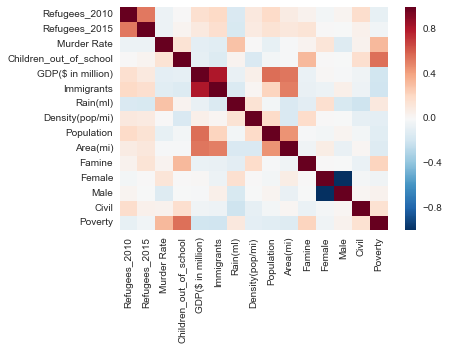

In [100]:
heat = sns.heatmap(final_df.corr())
heat

In [101]:
fig = heat.get_figure()
fig.savefig("../Images/HeatMap.png")

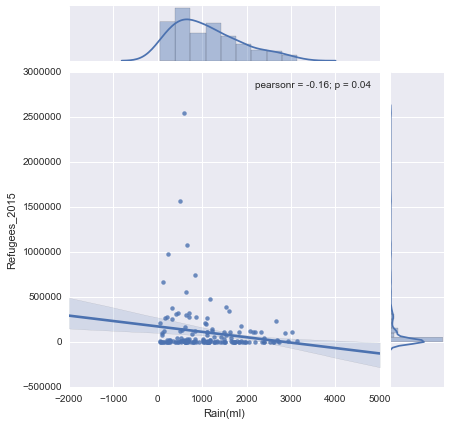

In [102]:
g = sns.jointplot("Rain(ml)", "Refugees_2015", data=final_df, kind="reg")
g.savefig("../Images/Rain-Ref.png")
#Negative relationship between rain fall and Refugees 2015

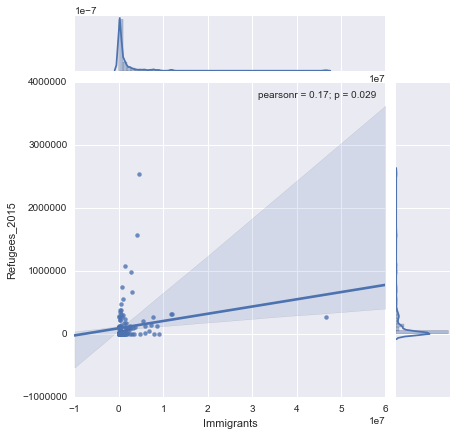

In [103]:
g = sns.jointplot("Immigrants", "Refugees_2015", data=final_df, kind="reg")
g.savefig("../Images/Imm-Ref.png")
#Positive relationship between Immigrants and number of Refugees (2015)

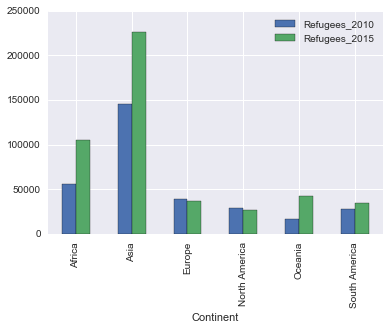

In [104]:
continent = final_df.groupby('Continent')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')
continent
fig = plt.gcf()
fig.savefig('../Images/Continent.png')

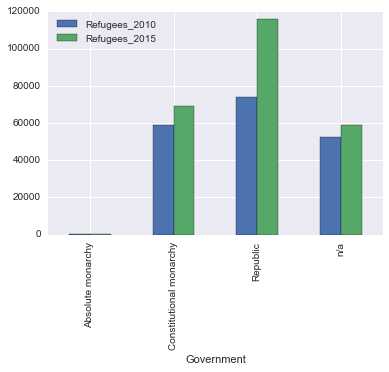

In [105]:
final_df.groupby('Government')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')
fig = plt.gcf()
fig.savefig('../Images/Government.png')

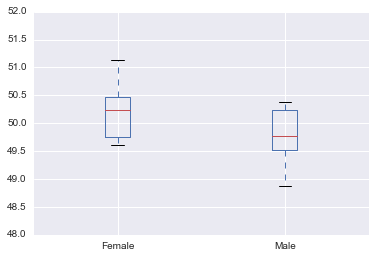

In [106]:
#The Box plot shows the relationship between the female and male population of each country.
final_df.groupby('Continent')[['Female', 'Male']].mean().plot(kind = 'box')
fig = plt.gcf()
fig.savefig('../Images/Gender.png')

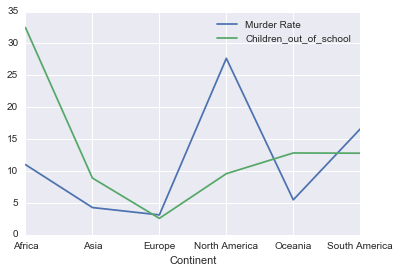

In [107]:
#Based on the line graph Africa has the most number of Children out of school, while North America has the most 
#murders. Overall Europe has the lowest value for both Murder Rate and Children out of school. 
final_df.groupby('Continent')[['Murder Rate', 'Children_out_of_school']].mean().plot(kind = 'line')
fig = plt.gcf()
fig.savefig('../Images/Line.png')

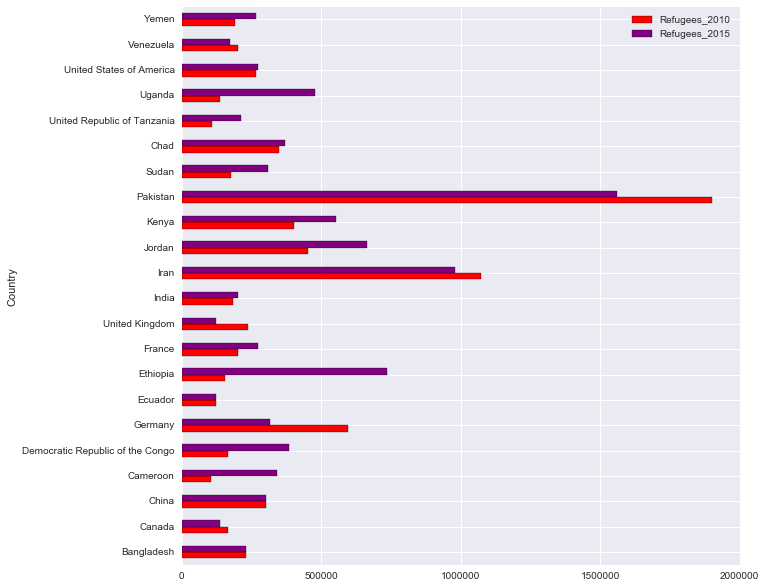

In [108]:
ref_2010 = final_df[(final_df.Refugees_2010 > 100000) & (final_df.Refugees_2015 > 100000)]
ref_2010.plot(kind='barh',x='Country',y=['Refugees_2010', 'Refugees_2015'],figsize=(10,10),color = ['red', 'purple'])
fig = plt.gcf()
fig.savefig('../Images/Country.png')

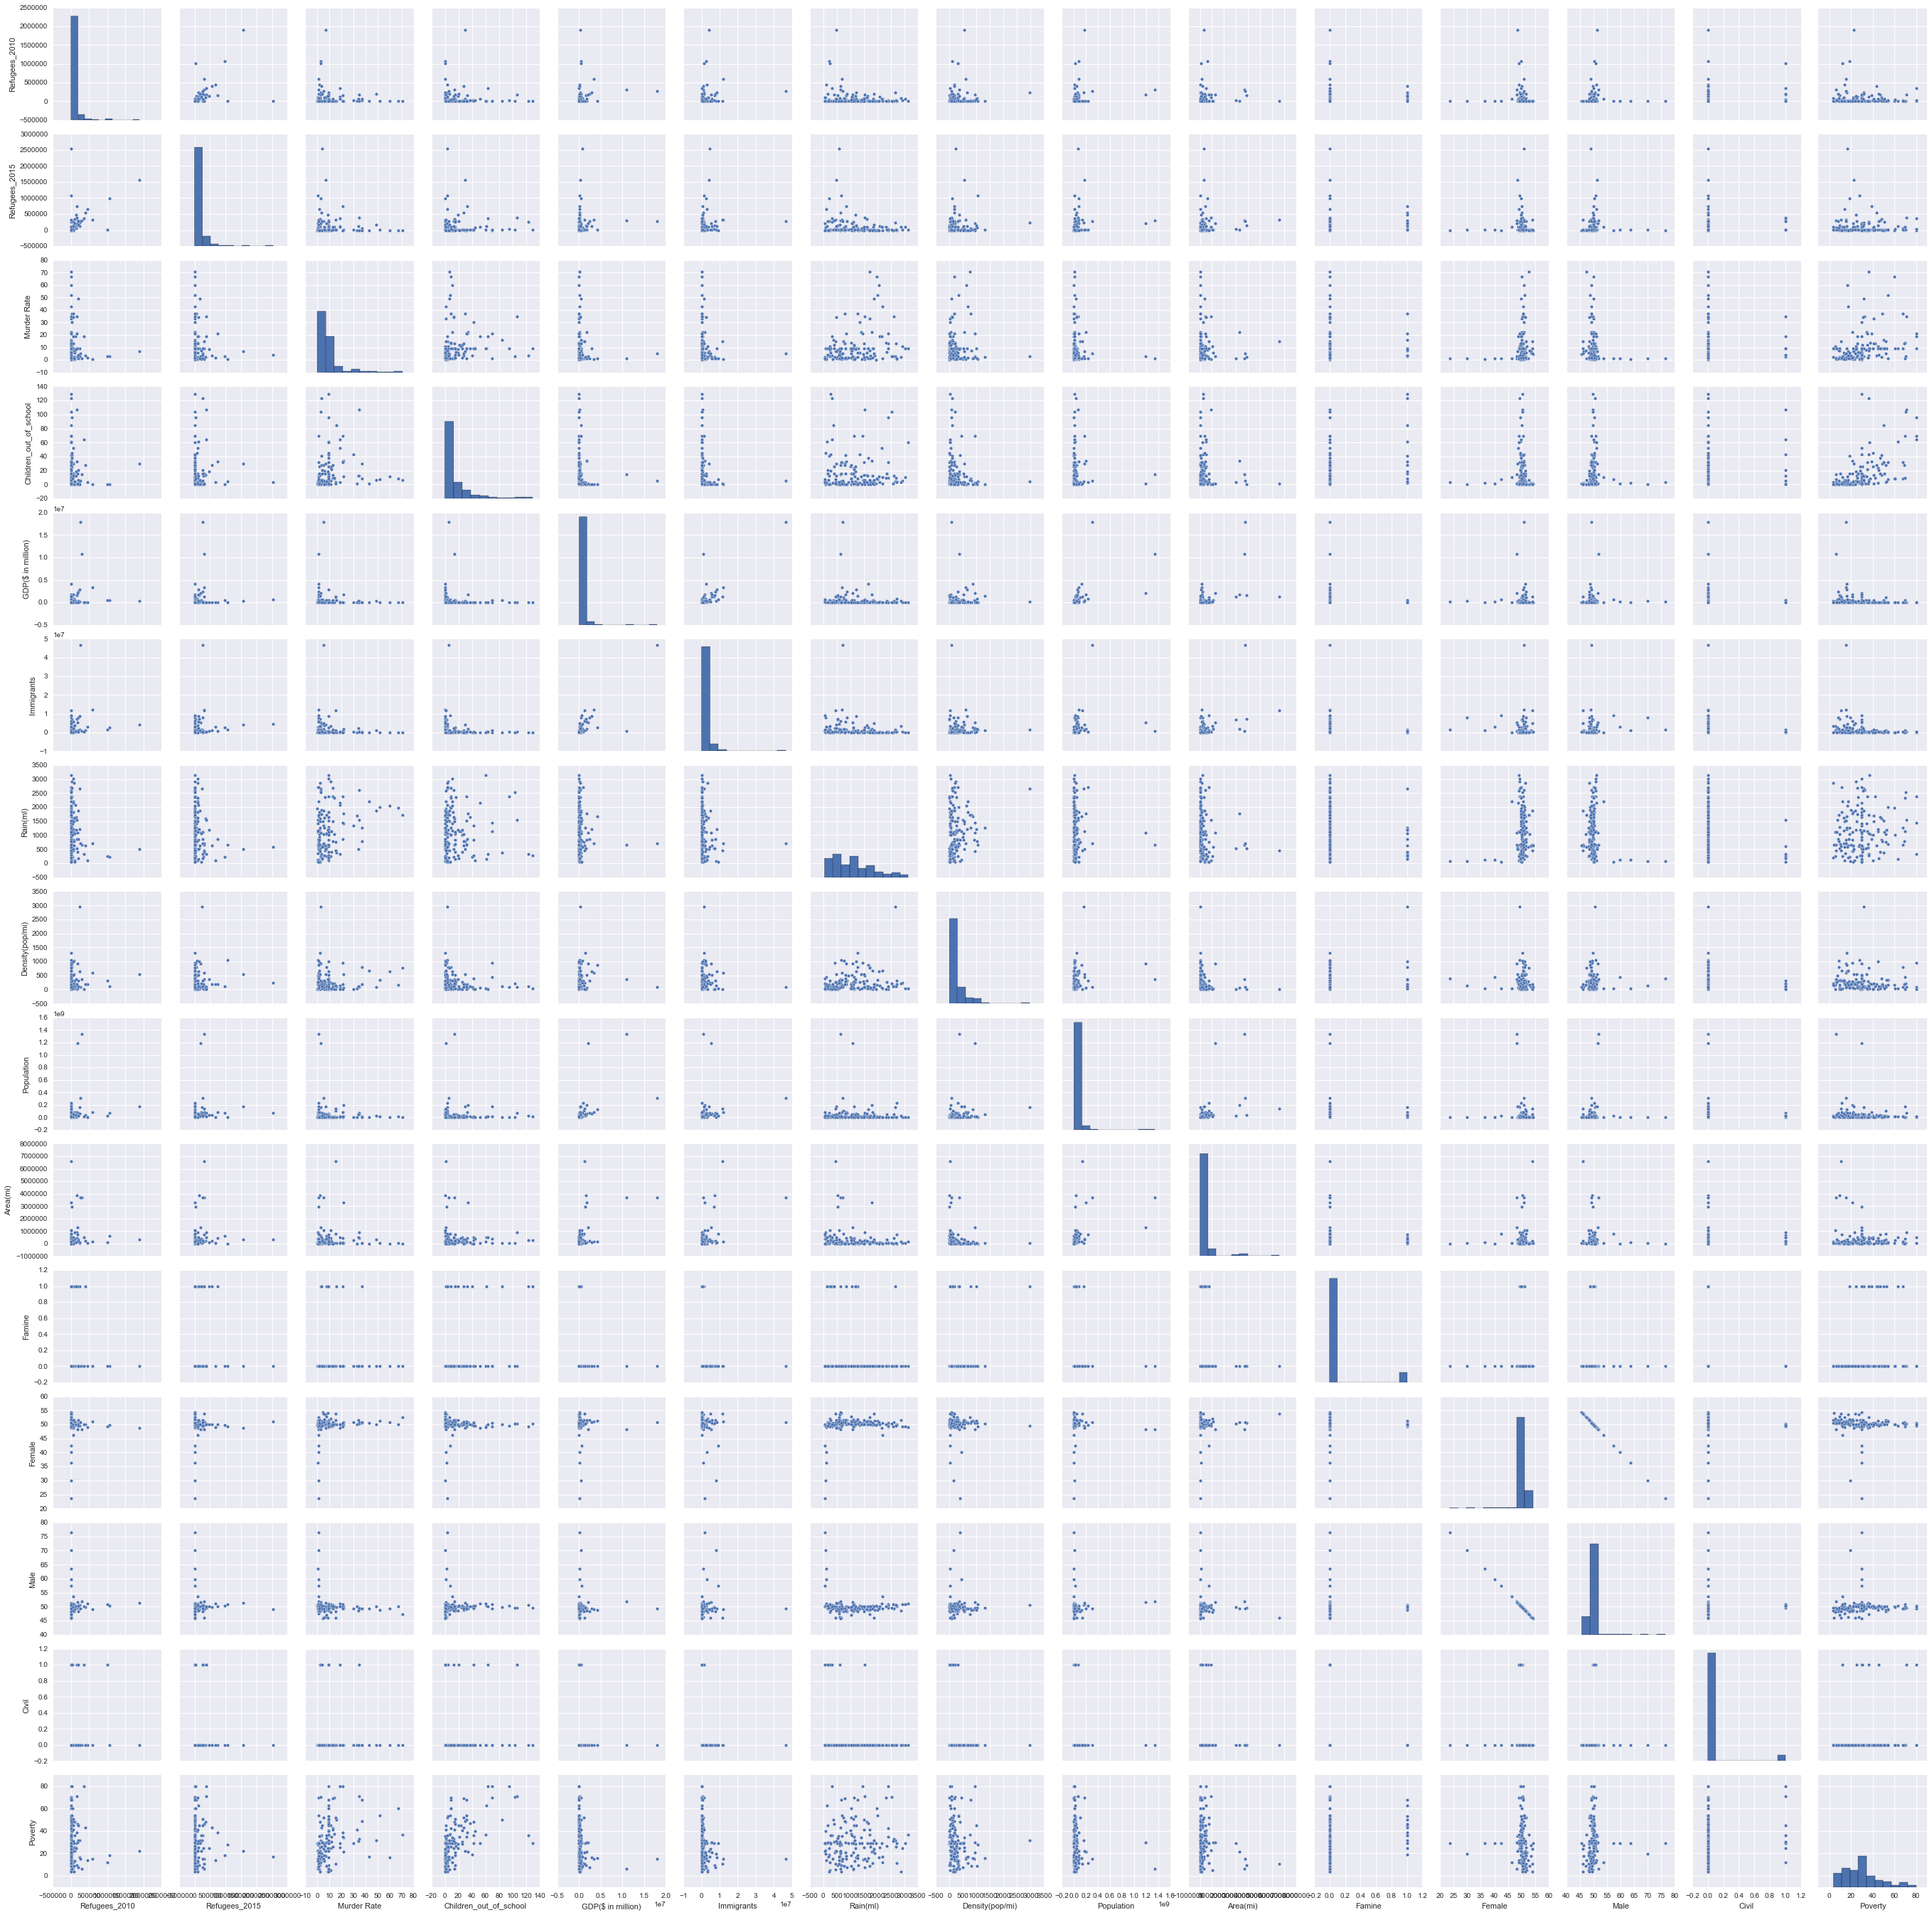

In [109]:
sns.pairplot(final_df)

# Data Dictionary

In [110]:
final_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [111]:
data_dict = { 'Country' : [final_df['Country'].dtypes, 'Country of the World', len(final_df['Country'])],
               'Key' : [final_df['Key'].dtypes, 'Key used for Folium', len(final_df['Key'])],
               'Continent' : [final_df['Continent'].dtypes, 'Continent of the Country', len(final_df['Continent'])],
               'Refugees_2010' : [final_df['Refugees_2010'].dtypes, 'Refugees in 2010', len(final_df['Refugees_2010'])],
               'Refugees_2015' : [final_df['Refugees_2015'].dtypes, 'Refugees in 2015', len(final_df['Refugees_2015'])],
               'Murder Rate' : [final_df['Murder Rate'].dtypes, 'Murder Rate per 100,000', len(final_df['Murder Rate'])],
               'Children_out_of_school' : [final_df['Children_out_of_school'].dtypes, 'Number of children out of primary school/1000', len(final_df['Children_out_of_school'])],
               'Government' : [final_df['Government'].dtypes, 'Government of the Country', len(final_df['Government'])],
               'GDP($ in million)' : [final_df['GDP($ in million)'].dtypes, 'GDP in US$ millions', len(final_df['GDP($ in million)'])],
               'Immigrants' : [final_df['Immigrants'].dtypes, 'Number of Immigrant Population', len(final_df['Immigrants'])],
               'Rain(ml)' : [final_df['Rain(ml)'].dtypes, 'Rain in ml per year/1000', len(final_df['Rain(ml)'])],
               'Density(pop/mi)' : [final_df['Density(pop/mi)'].dtypes, 'Density based on population and miles', len(final_df['Density(pop/mi)'])],
               'Population' : [final_df['Population'].dtypes, 'Population for each country', len(final_df['Population'])],
               'Area(mi)' : [final_df['Area(mi)'].dtypes, 'Area in miles', len(final_df['Area(mi)'])],
               'Famine': [final_df['Famine'].dtypes, 'If there is a major famine in the past 10 years', len(final_df['Famine'])],
               'Female': [final_df['Female'].dtypes, 'Percentage of female population', len(final_df['Female'])],
               'Male' : [final_df['Male'].dtypes, 'Percentage of male population', len(final_df['Male'])],
               'Poverty' : [final_df['Poverty'].dtypes, 'Percentage of poverty', len(final_df['Poverty'])]
            }

data_dict

{'Area(mi)': [dtype('float64'), 'Area in miles', 162],
 'Children_out_of_school': [dtype('float64'),
  'Number of children out of primary school/1000',
  162],
 'Continent': [dtype('O'), 'Continent of the Country', 162],
 'Country': [dtype('O'), 'Country of the World', 162],
 'Density(pop/mi)': [dtype('float64'),
  'Density based on population and miles',
  162],
 'Famine': [dtype('float64'),
  'If there is a major famine in the past 10 years',
  162],
 'Female': [dtype('float64'), 'Percentage of female population', 162],
 'GDP($ in million)': [dtype('float64'), 'GDP in US$ millions', 162],
 'Government': [dtype('O'), 'Government of the Country', 162],
 'Immigrants': [dtype('float64'), 'Number of Immigrant Population', 162],
 'Key': [dtype('O'), 'Key used for Folium', 162],
 'Male': [dtype('float64'), 'Percentage of male population', 162],
 'Murder Rate': [dtype('float64'), 'Murder Rate per 100,000', 162],
 'Population': [dtype('float64'), 'Population for each country', 162],
 'Poverty

In [112]:
final_df.to_csv('../Data/final_df_copy.csv', header=True, index=False, encoding='utf-8')

In [113]:
#2010 Refugees csv
ref2010 = final_df.filter(regex = '2015')
col = final_df.columns - ref2010.columns
final_df_2010 = final_df[col]

#2015 Refugees csv
ref2015 = final_df.filter(regex = '2010')
col = final_df.columns - ref2015.columns
final_df_2015 = final_df[col]

final_df_2010.rename(columns = {'Refugees_2010' : 'Refugees'}, inplace = True)
final_df_2015.rename(columns = {'Refugees_2015' : 'Refugees'}, inplace = True)

i = 0
yearList = []
while i < len(final_df_2010):
    yearList.append(2010)
    i+=1
final_df_2010['Year'] = yearList
    
j = 0
yearList2 = []
while j < len(final_df_2015):
    yearList2.append(2015)
    j+=1  
final_df_2015['Year'] = yearList2

final_df_2010.to_csv('/Users/nsivapra/Desktop/Capstone_Visual/Refugees_2010.csv', header=True, index=False, encoding='utf-8')
final_df_2015.to_csv('/Users/nsivapra/Desktop/Capstone_Visual/Refugees_2015.csv', header=True, index=False, encoding='utf-8')

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
